Taufik Nur Santiko  
A11.2022.14184

Implementasi Python dengan Dataset txt

In [3]:
# import library yang dibutuhkan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

# baca dataset dari file
datasetPath = "/content/Dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter = " ")

# mendefinisikan parameter k-means klustering
k = 2   # jumlah klaster yg diinginkan
iterationCounter = 0  # counter untuk iterasi
input = dataset   # input data

# fungsi untuk inisialisi titik pusat klaster (random)
def initCentroid(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace = False)]
  return result

In [4]:
# fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
  n = listClusterMembers.__len__()
  color = iter(cm.rainbow(np.linspace(0, 1, n)))
  plt.figure("result")
  plt.clf()
  plt.title("iteration-" + iteration)
  marker = itertools.cycle(('.', '*', '^', 'x', '+'))
  for i in range(n):
    col = next(color)
    memberCluster = np.asmatrix(listClusterMembers[i])
    plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                marker = marker.__next__(), s = 100, c = col, label = "klaster-" + str(i + 1))
  for i in range(n):
    plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker = marker.__next__()
                , c = col, label = "centroid-" + str(i + 1))
  if(converged == 0):
    plt.legend()
    plt.ion()
    plt.show()
    plt.pause(0.1)
  if(converged == 1):
    plt.legend()
    plt.show(block = True)

In [5]:
# Fungsi utama algoritma k-means
def kMeans(data, centroidInit):
  nCluster = k    # banyaknya klaster
  global iterationCounter
  centroidInit = np.matrix(centroidInit)

  # Looping hingga konvergen
  while(True):
    iterationCounter += 1
    euclideanMatrixAllCluster = np.ndarray(shape = (data.shape[0], 0))

    # ulangi proses untuk semua klaster
    for i in range(0, nCluster):
      centroidRepeated = np.repeat(centroidInit[i, :], data.shape[0], axis = 0)
      deltaMatrix = abs(np.subtract(data, centroidRepeated))

      # hitung jarak Euclidean
      euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis = 1))
      euclideanMatrixAllCluster = \
          np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis = 1)

    # tempatkan data ke klaster yang jarak Euclideannya paling dekat
    clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis = 1))
    listClusterMember = [[] for i in range(k)]
    for i in range(0, data.shape[0]):   # assign data to cluster regarding cluster matrix
      listClusterMember[np.asarray(clusterMatrix[i])].append(data[i, :]) ################

    # hitung titik pusat klaster terbaru
    newCentroid = np.ndarray(shape = (0, centroidInit.shape[1]))
    for i in range(0, nCluster):
      memberCluster = np.asmatrix(listClusterMember[i])
      centroidCluster = memberCluster.mean(axis = 0)
      newCentroid = np.concatenate((newCentroid, centroidCluster), axis = 0)
    print("iter: ", iterationCounter)
    print("centroid: ", newCentroid)

    # break dari loop jika sudah konvergen
    if((centroidInit == newCentroid).all()):
      break

    # update titik pusat klaster dengan nilai yang baru
    centroidInit = newCentroid

    # plot hasil klaster per iterasi
    plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
    time.sleep(1)   # diberi jeda 1 detik agar hasil plot klaster nyaman dilihat
  return listClusterMember, centroidInit

iter:  1
centroid:  [[-6.71196154 -6.95093846]
 [ 3.01790053  2.87861765]]


<ipython-input-4-1bba8367d215>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
<ipython-input-4-1bba8367d215>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker = marker.__next__()


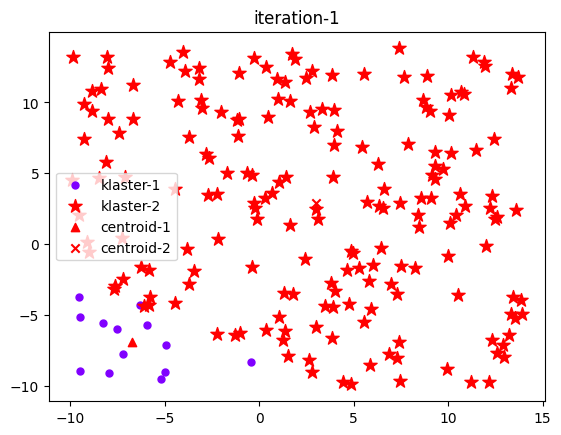

iter:  2
centroid:  [[-4.3843381  -4.8955    ]
 [ 4.18502595  4.1363943 ]]


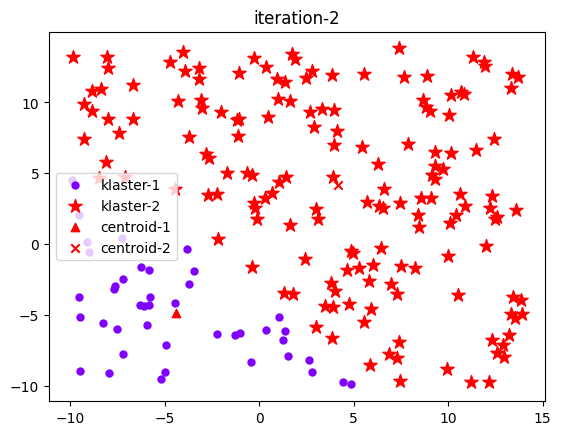

iter:  3
centroid:  [[-3.01439655 -4.25185517]
 [ 4.59103451  4.89117535]]


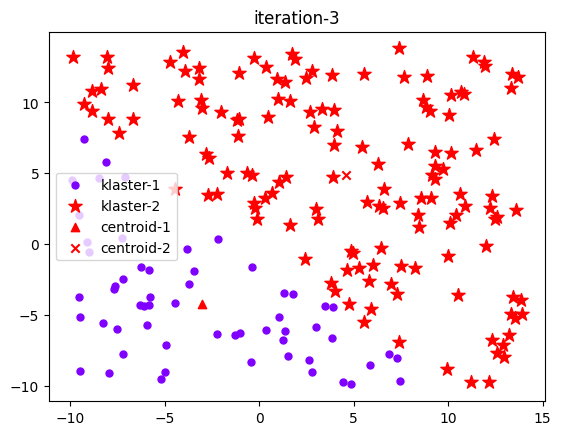

iter:  4
centroid:  [[-1.62467971 -4.33917391]
 [ 4.49767023  5.70490305]]


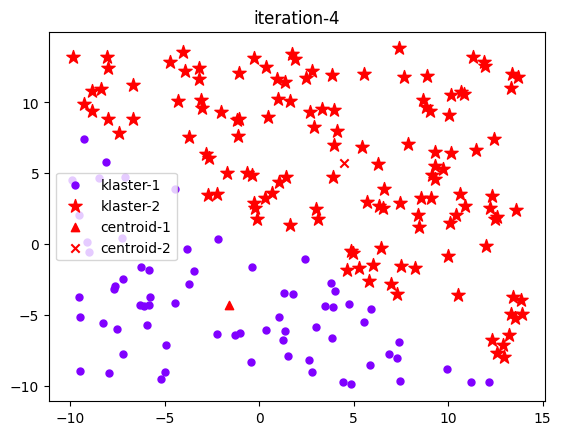

iter:  5
centroid:  [[-0.28769481 -4.53177532]
 [ 4.05889756  6.47874797]]


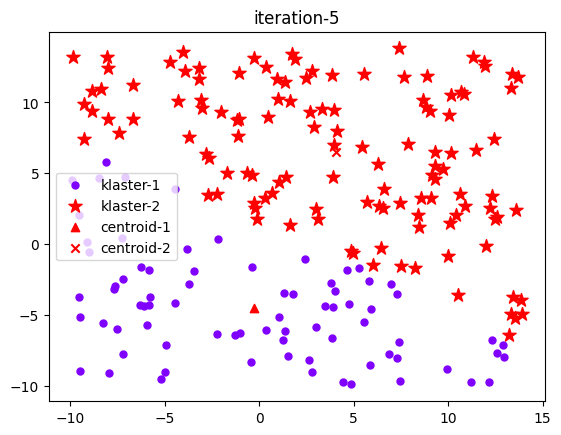

iter:  6
centroid:  [[ 1.38838966 -4.5999    ]
 [ 3.15311504  7.50558053]]


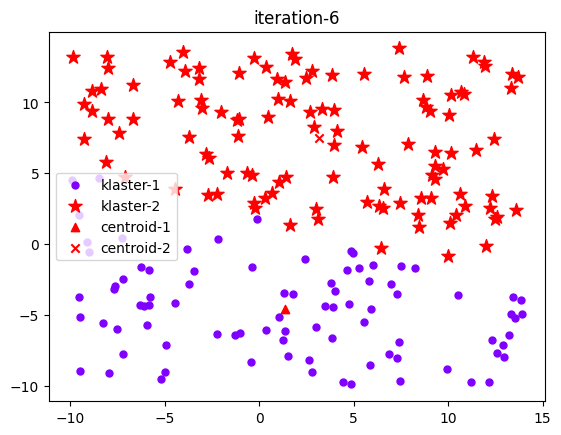

iter:  7
centroid:  [[ 1.90222584 -4.59886966]
 [ 2.77291712  7.72287117]]


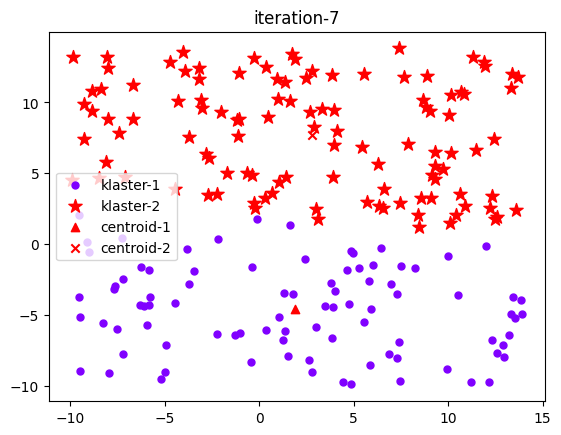

iter:  8
centroid:  [[ 1.90222584 -4.59886966]
 [ 2.77291712  7.72287117]]


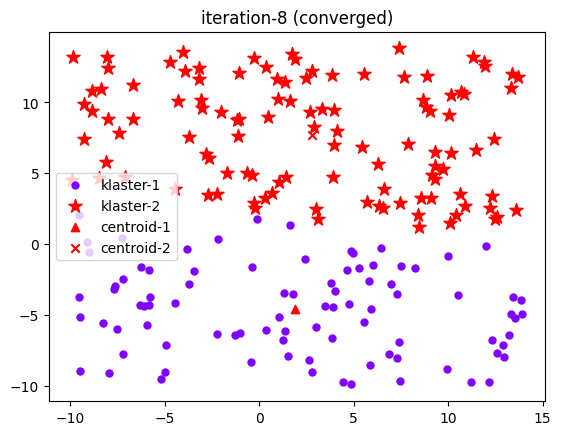

In [6]:
# panggil fungsi inisialisasi klaster
centroidInit = initCentroid(input, k)

# panggi fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)

# plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)